# LDA for Power Law: Scientific Papers

In [1]:
import pandas as pd
from wordcloud import WordCloud
import re
import gensim
from gensim.utils import simple_preprocess
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.corpus import stopwords

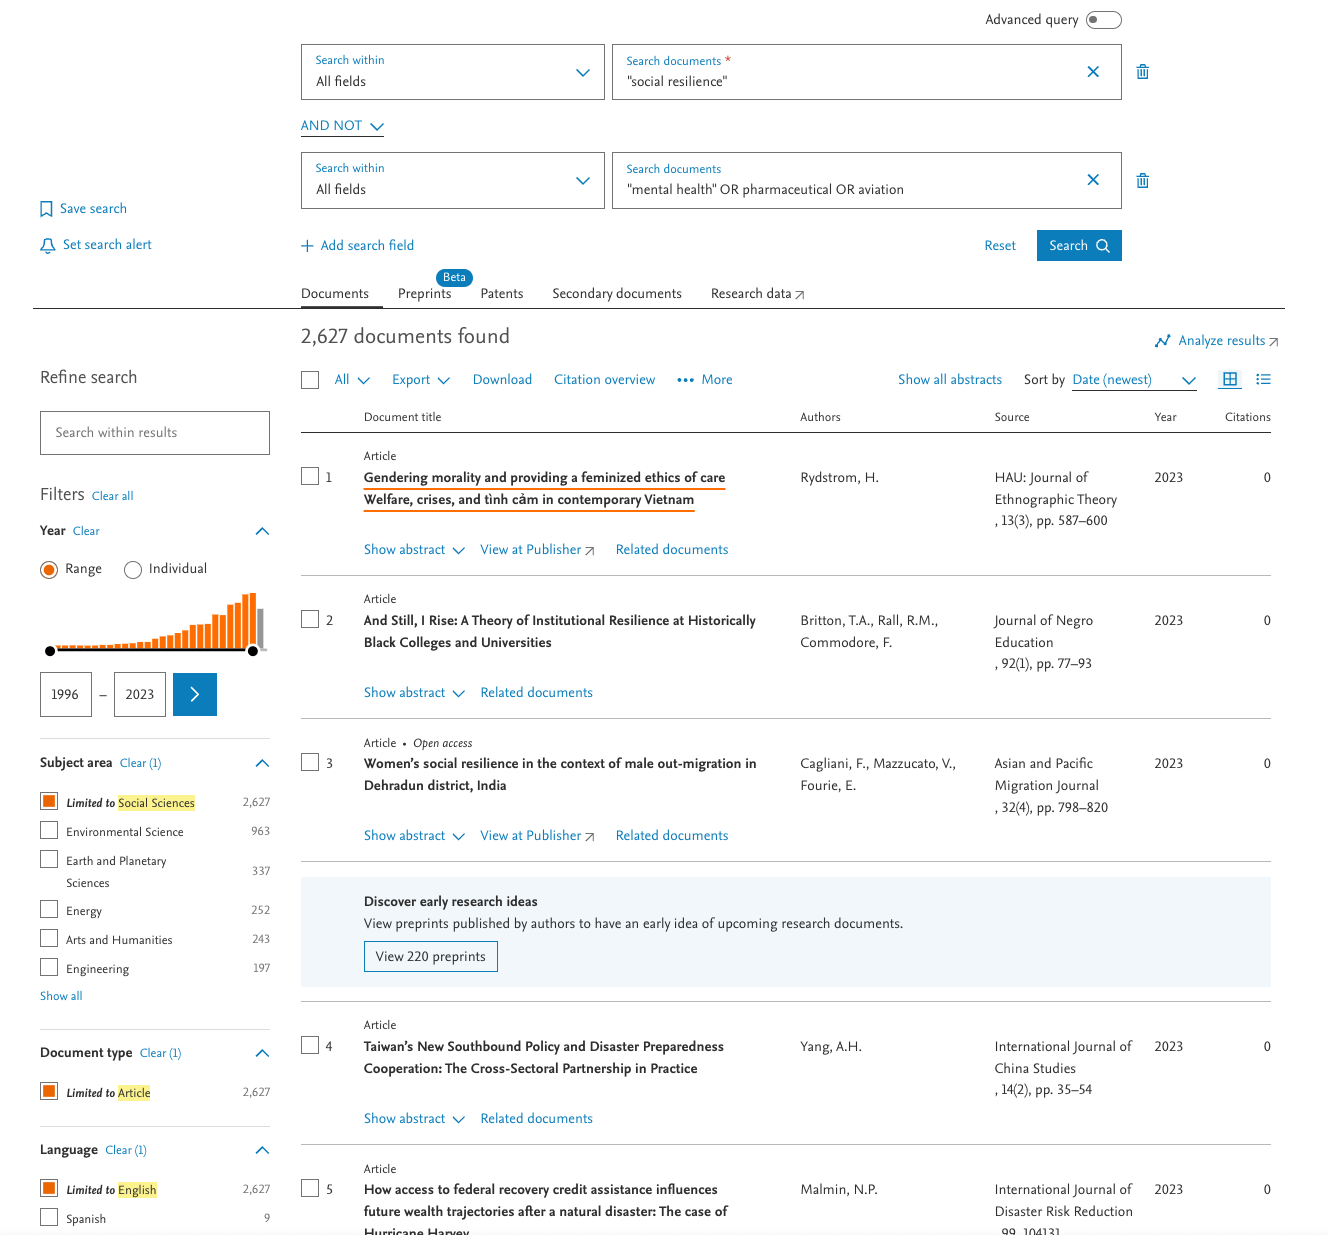
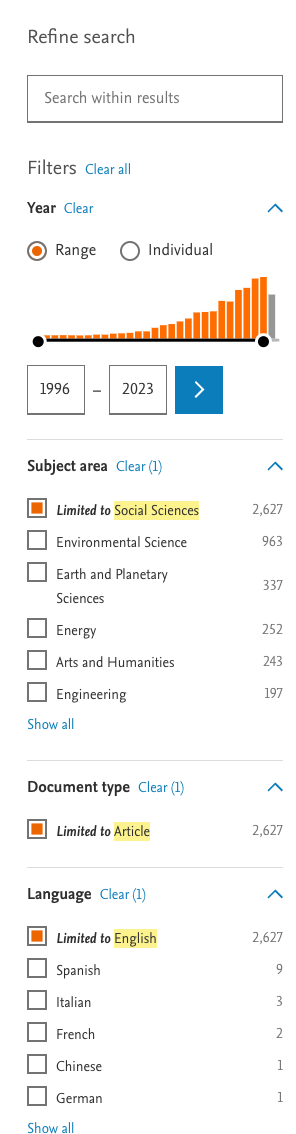

# Read data

In [5]:
data = pd.read_csv('../data/papers.csv')[['Authors','Title', 'Year', 'Abstract', 'Author Keywords', 'Index Keywords', 'Funding Texts', 'Cited by']]
data.head()

,Authors,Title,Year,Abstract,Author Keywords,Index Keywords,Funding Texts,Cited by
0,Tao D.; Zhang R.; Xu J.; Zheng L.; Zhang G.; Z...,Understanding the nature of early agriculture ...,2023,Agriculture constitutes the economic foundatio...,Agricultural sustainability; Archaeobotany; Ce...,NaN,This research was supported by Chinese Nationa...,0
1,Promkhambut A.; Yokying P.; Woods K.; Fisher M...,Rethinking agrarian transition in Southeast As...,2023,This paper contributes to new understandings o...,Agrarian transition; Rice; Smallholder persist...,Southeast Asia; Thailand; accessibility; agrar...,Funding text 1: The authors would like to than...,7
2,Rasekhi S.; Mofidi-Chelan M.; Skataric G.; Vär...,Sustainability of the local stakeholder networ...,2023,Sustainable land management (SLM) as a holisti...,Cooperation; Social capital; Social resilience...,Iran; grassland; land management; rangeland; s...,NaN,0
3,Oktavianus J.; Davidson B.,Countering terrorism on social media: An analy...,2023,This study scrutinizes the nature of online ci...,Collective actions; counter-terrorism; framing...,NaN,NaN,0
4,Junger L.; Davids P.; Stöglehner G.; Hartmann T.,Multidimensional resilience - flood recovery o...,2023,Flood damages are increasing and thus flood re...,Financial resilience; Flood risk management; L...,NaN,"Funding text 1: Besides public funding, the in...",0


# Data cleaning

## Keywords

In [7]:
abstracts = data[['Authors','Abstract']]
abstracts.head()

<2627x2642 sparse matrix of type '<class 'numpy.int64'>'
	with 36607 stored elements in Compressed Sparse Row format>

## Cleaning the text

In [4]:
# Remove punctuation from the 'Abstract' column
abstracts['abstract_processed'] = \
abstracts['Abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the text in the 'Abstract' column to lowercase
abstracts['abstract_processed'] = \
abstracts['abstract_processed'].map(lambda x: x.lower())

# Print out the first rows of the processed 'Abstract' column
abstracts['abstract_processed'].head()

/var/folders/vt/9xf6xhpx3b16kyttfwqfh3kr0000gr/T/ipykernel_23659/2219681825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abstracts['abstract_processed'] = \
/var/folders/vt/9xf6xhpx3b16kyttfwqfh3kr0000gr/T/ipykernel_23659/2219681825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abstracts['abstract_processed'] = \


0    agriculture constitutes the economic foundatio...
1    this paper contributes to new understandings o...
2    sustainable land management (slm) as a holisti...
3    this study scrutinizes the nature of online ci...
4    flood damages are increasing and thus flood re...
Name: abstract_processed, dtype: object

## Defining stopwords

In [5]:
# Set of stopwords and extend the stop words list
sw_list = pd.read_csv('../data/StopWord.csv', encoding='latin1')
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'research'])
stop_words.extend(sw_list['StopWord'].tolist())

# Exploratory Analysis

# Unigram

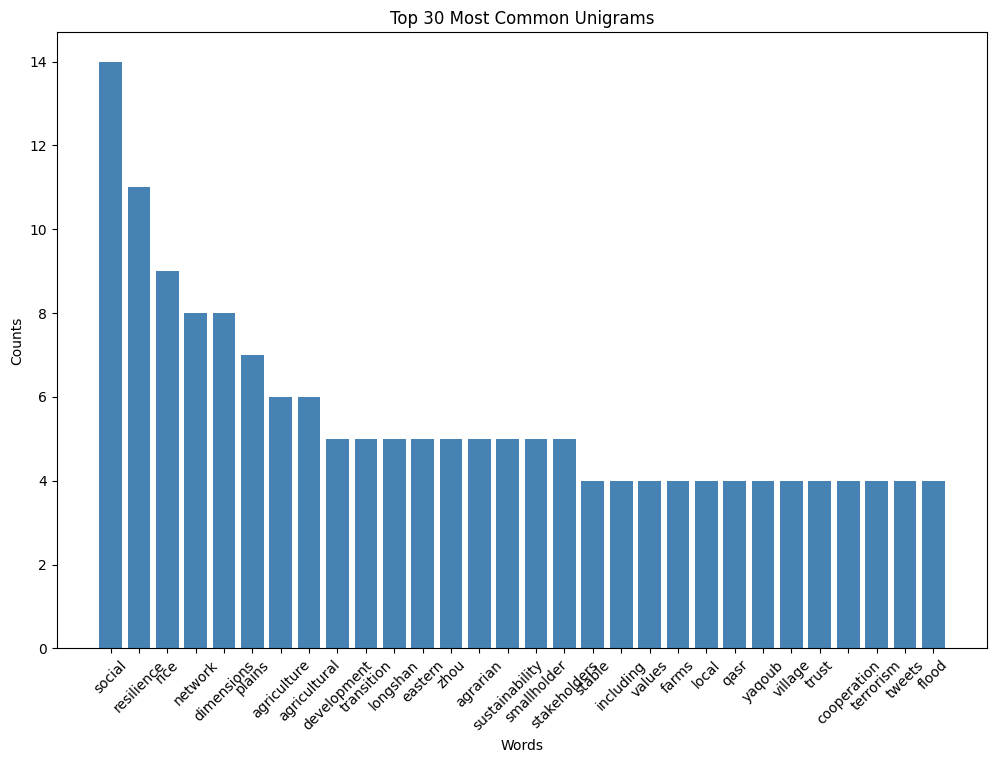

In [6]:
# Sample data from abstracts['abstract_processed'].head()
sample_data = abstracts['abstract_processed'].head().tolist()

# Function to preprocess sentences
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Function to remove stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

# Process the sample data
data_words = list(sent_to_words(sample_data))

# Remove stop words
data_words = remove_stopwords(data_words)

# Flatten the list of lists
all_words = [word for sublist in data_words for word in sublist]

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common unigrams
common_words = word_counts.most_common(30)

# Separate the words and their counts for plotting
words, counts = zip(*common_words)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(words, counts, color='steelblue')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 30 Most Common Unigrams')
plt.xticks(rotation=45)
plt.show()

## Bigrams

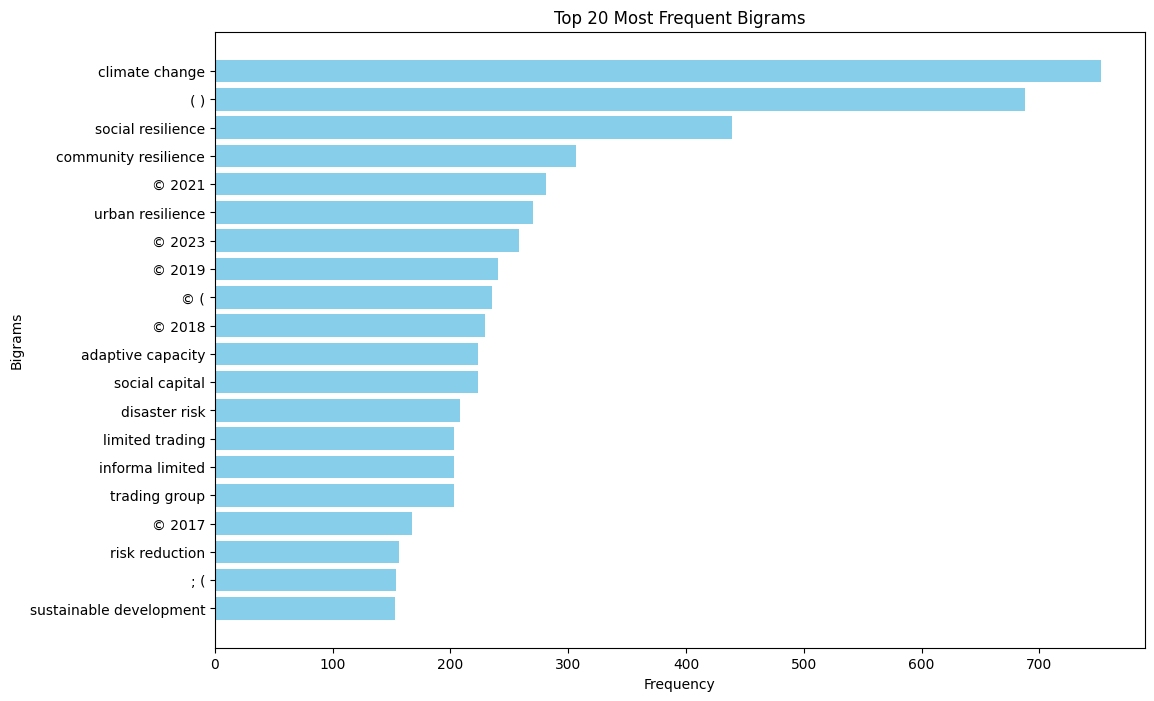

In [7]:
# Function to tokenize text into bigrams and remove stopwords
def get_bigrams(text):
    tokens = [word for word in nltk.word_tokenize(text) if word.lower() not in stop_words]
    bigrams = list(nltk.bigrams(tokens))
    return [' '.join(bigram) for bigram in bigrams]

# Generate bigrams for all documents in 'abstract_processed'
all_bigrams = []
for text in abstracts['abstract_processed']:
    all_bigrams.extend(get_bigrams(text))

# Count the frequency of each bigram
bigram_counts = Counter(all_bigrams)

# Create a DataFrame for visualization
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['bigram', 'count'])
bigram_df = bigram_df.sort_values(by='count', ascending=False).head(20)  # Top 20 most frequent bigrams

# Plot the bigram frequencies
plt.figure(figsize=(12, 8))
plt.barh(bigram_df['bigram'], bigram_df['count'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Most Frequent Bigrams')
plt.gca().invert_yaxis()
plt.show()


# LDA Analysis

In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data_tp = abstracts.abstract_processed.values.tolist()
data_words = list(sent_to_words(data_tp))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['agriculture', 'constitutes', 'economic', 'social', 'complexity', 'civilization', 'ancient', 'agricultural', 'practices', 'ordinary', 'settlements', 'basic', 'unit', 'reflect', 'agricultural', 'production', 'technology', 'basic', 'guarantee', 'sustained', 'development', 'stable', 'plains', 'witnessed', 'social', 'transition', 'onset', 'development', 'state', 'urbanization']


In [9]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 6), (5, 5), (6, 1), (7, 1), (8, 2), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 1), (15, 2), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 5), (29, 1)]


# LDA model training

In [10]:
from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"social" + 0.007*"resilience" + 0.007*"risk" + 0.006*"climate" + '
  '0.006*"disaster" + 0.006*"change" + 0.005*"urban" + 0.005*"management" + '
  '0.005*"vulnerability" + 0.004*"environmental"'),
 (1,
  '0.018*"resilience" + 0.012*"social" + 0.007*"community" + 0.007*"urban" + '
  '0.006*"development" + 0.006*"change" + 0.005*"climate" + 0.004*"rural" + '
  '0.004*"economic" + 0.004*"management"'),
 (2,
  '0.021*"resilience" + 0.012*"social" + 0.007*"community" + 0.007*"urban" + '
  '0.006*"communities" + 0.006*"economic" + 0.006*"disaster" + 0.005*"local" + '
  '0.004*"climate" + 0.004*"change"'),
 (3,
  '0.012*"resilience" + 0.007*"social" + 0.005*"local" + 0.005*"communities" + '
  '0.005*"community" + 0.005*"economic" + 0.004*"climate" + '
  '0.004*"development" + 0.004*"change" + 0.003*"urban"')]


## Topic name by AI

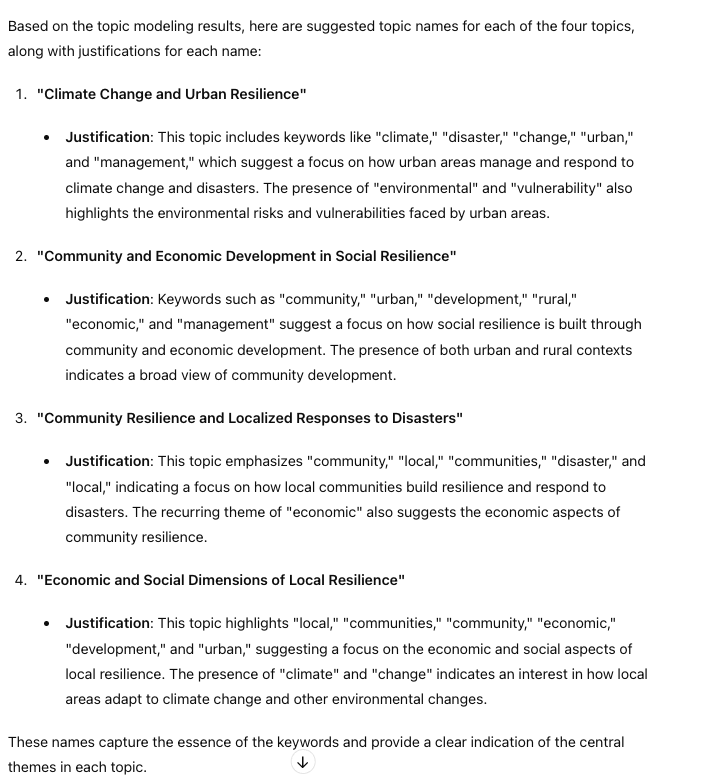

## Assign Topics to documents

In [11]:
# Get the topic distribution for each document
topics = lda_model.get_document_topics(corpus)

# Assign the most probable topic to each document
abstracts['topic'] = [max(topic, key=lambda x: x[1])[0] for topic in topics]
abstracts.head()

/var/folders/vt/9xf6xhpx3b16kyttfwqfh3kr0000gr/T/ipykernel_23659/461486739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abstracts['topic'] = [max(topic, key=lambda x: x[1])[0] for topic in topics]


,Authors,Abstract,abstract_processed,topic
0,Tao D.; Zhang R.; Xu J.; Zheng L.; Zhang G.; Z...,Agriculture constitutes the economic foundatio...,agriculture constitutes the economic foundatio...,1
1,Promkhambut A.; Yokying P.; Woods K.; Fisher M...,This paper contributes to new understandings o...,this paper contributes to new understandings o...,0
2,Rasekhi S.; Mofidi-Chelan M.; Skataric G.; Vär...,Sustainable land management (SLM) as a holisti...,sustainable land management (slm) as a holisti...,1
3,Oktavianus J.; Davidson B.,This study scrutinizes the nature of online ci...,this study scrutinizes the nature of online ci...,1
4,Junger L.; Davids P.; Stöglehner G.; Hartmann T.,Flood damages are increasing and thus flood re...,flood damages are increasing and thus flood re...,2


In [12]:
# # Topic names based on the modeling
# topic_names = {
#     0: 'Community Resilience and Risk Management',
#     1: 'Urban Resilience and Climate Change',
#     2: 'Disaster Resilience and Social Vulnerability',
#     3: 'Social Resilience and Community Development'
# }

# # Add topic names to the DataFrame
# abstracts['topic_name'] = abstracts['topic'].map(topic_names)

# # If you want to add the topic name directly into the abstract text
# abstracts['abstract_with_topic'] = abstracts.apply(
#     lambda row: f"Topic: {row['topic_name']}\n{row['abstract_processed']}", axis=1
# )

# # Display the DataFrame with the new columns
# print(abstracts[['abstract_with_topic']])

# Analyzing LDA model results

In [13]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('../data/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '../data/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.007831 -0.005040       1        1  38.949393
2      0.003342 -0.010678       2        1  27.801728
0      0.006787  0.014444       3        1  23.890633
3     -0.017961  0.001274       4        1   9.358246, topic_info=             Term         Freq        Total Category  logprob  loglift
74     resilience  4006.000000  4006.000000  Default  30.0000  30.0000
199   communities  1044.000000  1044.000000  Default  29.0000  29.0000
81         social  3187.000000  3187.000000  Default  28.0000  28.0000
226         local  1002.000000  1002.000000  Default  27.0000  27.0000
32       economic  1088.000000  1088.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
413          risk    57.053929   996.490689   Topic4  -6.0291  -0.4913
748      disaster    59.746688  1190.582887   Topic4  -5.9830  -0.6232
1119       people    48.748634   611.465477   Topic4  -6.1864  -0.1603
801      capacity    47.314231   582.162278   Topic4  -6.2163  -0.1410
362    adaptation    47.030144   668.112170   Topic4  -6.2223  -0.2848

[353 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
4194       1  0.317884  aboveground
4194       4  0.635768  aboveground
4002       1  0.275745     abstract
4002       2  0.114894     abstract
4002       3  0.091915     abstract
...      ...       ...          ...
1126       4  0.067868        wider
14290      4  0.621254        wrote
9915       2  0.717738         yavi
9915       3  0.179435         yavi
9915       4  0.179435         yavi

[742 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

# Merge with dataset

In [14]:
# Inner join abstracts with the original data by authors and abstracts

merged_data = data.merge(abstracts, on=['Authors', 'Abstract'], how='inner')
merged_data.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,abstract_processed,topic
0,Tao D.; Zhang R.; Xu J.; Zheng L.; Zhang G.; Z...,"Tao, Dawei (36679177300); Zhang, Ruijin (57787...",36679177300; 57787223400; 57196735064; 5852592...,Understanding the nature of early agriculture ...,2023,Journal of Archaeological Science: Reports,51,NaN,104162,NaN,...,NaN,English,J.Archaeol. Sci. Rep.,Article,Final,NaN,Scopus,2-s2.0-85166970356,agriculture constitutes the economic foundatio...,1
1,Promkhambut A.; Yokying P.; Woods K.; Fisher M...,"Promkhambut, Arunee (36551471600); Yokying, Ph...",36551471600; 57194175299; 56427044400; 5643033...,Rethinking agrarian transition in Southeast As...,2023,World Development,169,NaN,106309,NaN,...,NaN,English,World Dev.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85161705867,this paper contributes to new understandings o...,0
2,Rasekhi S.; Mofidi-Chelan M.; Skataric G.; Vär...,"Rasekhi, Sareh (58654635100); Mofidi-Chelan, M...",58654635100; 57212586859; 57206668275; 1483196...,Sustainability of the local stakeholder networ...,2023,Applied Geography,161,NaN,103093,NaN,...,NaN,English,Appl. Geogr.,Article,Final,NaN,Scopus,2-s2.0-85174464410,sustainable land management (slm) as a holisti...,1
3,Oktavianus J.; Davidson B.,"Oktavianus, Jeffry (57219595487); Davidson, Br...",57219595487; 57226274860,Countering terrorism on social media: An analy...,2023,Communication and the Public,8,4,NaN,308,...,NaN,English,Communication and the Public,Article,Final,NaN,Scopus,2-s2.0-85166207236,this study scrutinizes the nature of online ci...,1
4,Junger L.; Davids P.; Stöglehner G.; Hartmann T.,"Junger, L. (57226157526); Davids, P. (57208921...",57226157526; 57208921403; 57211128670; 3579539...,Multidimensional resilience - flood recovery o...,2023,International Journal of Disaster Risk Reduction,96,NaN,103993,NaN,...,NaN,English,Int. J. Disaster Risk Reduct.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85170416926,flood damages are increasing and thus flood re...,2


# Preparing data for power law

In [15]:
power_law = merged_data[['Authors','Title', 'Year', 'Abstract', 'Author Keywords', 'Index Keywords', 'Funding Texts', 'Cited by', 'topic']]
power_law.head()

,Authors,Title,Year,Abstract,Author Keywords,Index Keywords,Funding Texts,Cited by,topic
0,Tao D.; Zhang R.; Xu J.; Zheng L.; Zhang G.; Z...,Understanding the nature of early agriculture ...,2023,Agriculture constitutes the economic foundatio...,Agricultural sustainability; Archaeobotany; Ce...,NaN,This research was supported by Chinese Nationa...,0,1
1,Promkhambut A.; Yokying P.; Woods K.; Fisher M...,Rethinking agrarian transition in Southeast As...,2023,This paper contributes to new understandings o...,Agrarian transition; Rice; Smallholder persist...,Southeast Asia; Thailand; accessibility; agrar...,Funding text 1: The authors would like to than...,7,0
2,Rasekhi S.; Mofidi-Chelan M.; Skataric G.; Vär...,Sustainability of the local stakeholder networ...,2023,Sustainable land management (SLM) as a holisti...,Cooperation; Social capital; Social resilience...,Iran; grassland; land management; rangeland; s...,NaN,0,1
3,Oktavianus J.; Davidson B.,Countering terrorism on social media: An analy...,2023,This study scrutinizes the nature of online ci...,Collective actions; counter-terrorism; framing...,NaN,NaN,0,1
4,Junger L.; Davids P.; Stöglehner G.; Hartmann T.,Multidimensional resilience - flood recovery o...,2023,Flood damages are increasing and thus flood re...,Financial resilience; Flood risk management; L...,NaN,"Funding text 1: Besides public funding, the in...",0,2


In [16]:
# Number of topic
power_law.groupby('topic')['topic'].value_counts()  

topic
0     600
1    1031
2     716
3     280
Name: count, dtype: int64

In [17]:
# Filter by topic = 0 and arrange by 'Cited by' in descending order
topic_0 = power_law[power_law['topic'] == 0].sort_values(by='Cited by', ascending=False)
topic_0

,Authors,Title,Year,Abstract,Author Keywords,Index Keywords,Funding Texts,Cited by,topic
2583,Adger W.N.,Vulnerability,2006,This paper reviews research traditions of vuln...,Adaptation; Disasters; Food insecurity; Govern...,adaptation; climate change; resilience; social...,I thank Elinor Ostrom and Marco Janssen for in...,4143,0
2593,Smit B.; Wandel J.,"Adaptation, adaptive capacity and vulnerability",2006,This paper reviews the concept of adaptation o...,Adaptation; Adaptive capacity; Applications; B...,adaptation; climate change; environmental haza...,We gratefully acknowledge the stimulus provide...,3444,0
2604,Adger W.N.; Huq S.; Brown K.; Declan C.; Mike H.,Adaptation to climate change in the developing...,2003,The world's climate is changing and will conti...,adaptation; climate change; environmental poli...,NaN,NaN,1180,0
2479,Gupta J.; Termeer C.; Klostermann J.; Meijerin...,The Adaptive Capacity Wheel: A method to asses...,2010,Climate change potentially brings continuous a...,Adaptive capacity; Climate change; Criteria; G...,article; climate change; content analysis; env...,This paper is part of ongoing research entitle...,575,0
2446,Sultana F.,"Suffering for water, suffering from water: Emo...",2011,"This article argues that resource access, use,...",Bangladesh; Conflict; Emotional geography; Gen...,Bangladesh; drinking water; gender; nature-soc...,I would like to thank Becky Elmhirst for invit...,387,0
...,...,...,...,...,...,...,...,...,...
576,Leedy T.H.,Race around the Mountain: Competitive Cycling ...,2022,Early accounts place the origins of bicycle ra...,bicycle; Coloured; racing; resilience; South A...,NaN,The author wishes to thank the Center for Afri...,0,0
254,Clegg L.; Galindo-Gutierrez J.,Green electoral performance and national clima...,2023,Does Green party electoral success lead to inc...,climate change; EU; Greens; inter-party compet...,NaN,NaN,0,0
264,Castro J.C.R.; Romero-Delgado M.,Visual Self-Representations of Households Livi...,2023,Negative social representations of poverty and...,Economic vulnerability; poverty; Spain; visual...,NaN,NaN,0,0
265,Busilacchi G.; Giovanola B.,Contemporary European Welfare State Transforma...,2023,"Over the last decades, there has been a huge d...",capability; distributive justice; luck egalita...,NaN,NaN,0,0


In [18]:
# save power law data
power_law.to_csv('../data/power_law.csv', index=False)